In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("/kaggle/input/e-commerce-dataset/ecommerce_dataset_updated.csv")

In [2]:
print("Sample")
print(df.sample(10))
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], format='%d-%m-%Y')

print("\nBasic Statistics")
print(df.describe())

print("\nData Types")
print(df.info())
df["Purchase_Month"] = df['Purchase_Date'].dt.month

print("\nNulls")
print(df.isnull().sum())

print("\nDuplicates")
print(df.duplicated().sum())

Sample
       User_ID  Product_ID        Category  Price (Rs.)  Discount (%)  \
1954  c5a1e762  d2e653f1-1           Books       436.44            10   
735   2d4ac994  1a38d99a-4     Electronics       424.82            50   
309   a87689fb  cb2df151-f        Clothing       438.97            10   
3027  36f1d6a4  348eebab-6            Toys       476.90            30   
1996  611f07b5  62b4ee7a-6  Home & Kitchen       187.84            20   
475   a852ff82  d269fa86-d  Home & Kitchen       169.92            25   
2778  27e8fb1c  0ab6838c-8           Books       455.69            25   
1214  07fd6558  e77e1af7-5     Electronics       152.24            50   
1218  e3f9922a  7bf2973a-6            Toys       241.25            20   
2160  7432f04c  7036a176-4        Clothing        41.68             0   

      Final_Price(Rs.)    Payment_Method Purchase_Date  
1954            392.80               UPI    21-09-2024  
735             212.41  Cash on Delivery    31-01-2024  
309             39

In [3]:
print("Non Numeric Cols:")
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns.to_list()
print(non_numeric_cols)

print("\nCorrelation Matrix:")
correlation_matrix = df.corr(numeric_only = True)
print(correlation_matrix)

Non Numeric Cols:
['User_ID', 'Product_ID', 'Category', 'Payment_Method', 'Purchase_Date']

Correlation Matrix:
                  Price (Rs.)  Discount (%)  Final_Price(Rs.)  Purchase_Month
Price (Rs.)          1.000000     -0.003473          0.935691        0.002152
Discount (%)        -0.003473      1.000000         -0.311515        0.012238
Final_Price(Rs.)     0.935691     -0.311515          1.000000       -0.002348
Purchase_Month       0.002152      0.012238         -0.002348        1.000000


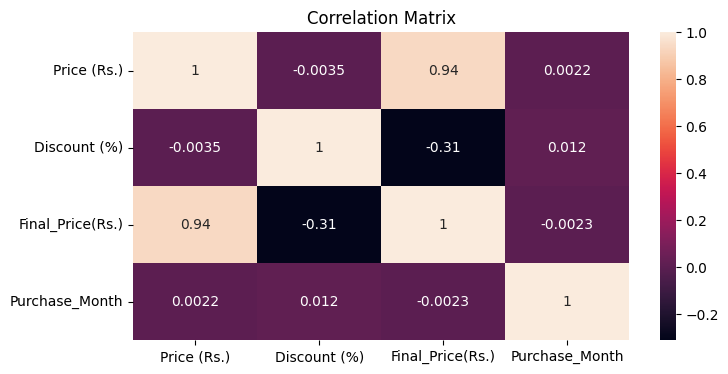

In [4]:
plt.figure(figsize = (8,4))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

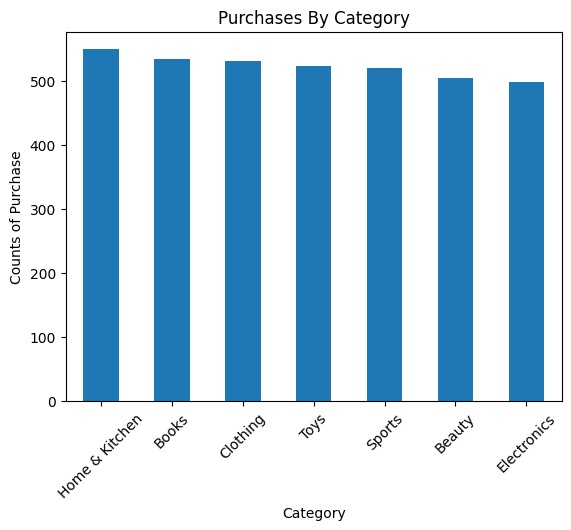

In [5]:
df['Category'].value_counts().plot(kind = 'bar')
plt.xlabel("Category")
plt.ylabel("Counts of Purchase")
plt.xticks(rotation = 45)
plt.title("Purchases By Category")
plt.show()

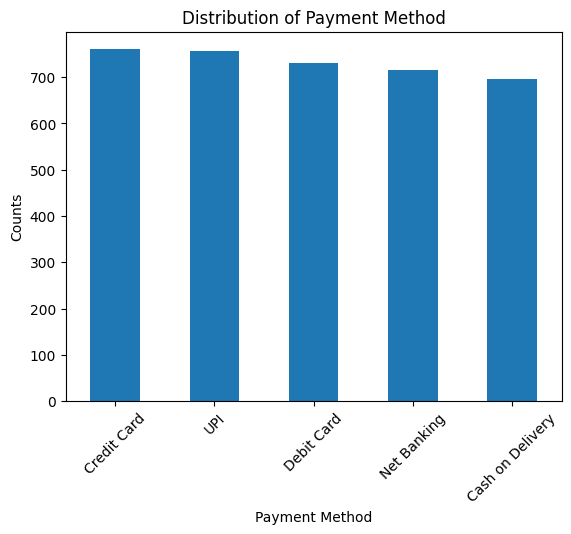

In [6]:
df['Payment_Method'].value_counts().plot(kind = 'bar')
plt.title("Distribution of Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Counts")
plt.xticks(rotation = 45)
plt.show()

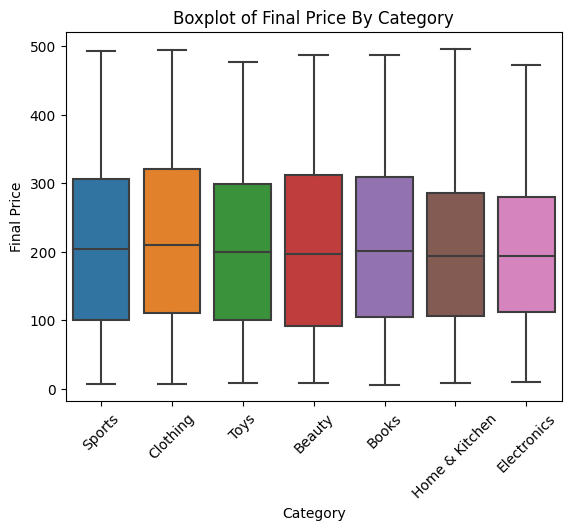

In [7]:
sns.boxplot(data = df, y = 'Final_Price(Rs.)', x = 'Category')
plt.title("Boxplot of Final Price By Category")
plt.xlabel("Category")
plt.ylabel("Final Price")
plt.xticks(rotation=45)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Final_Price(Rs.)', ylabel='Count'>

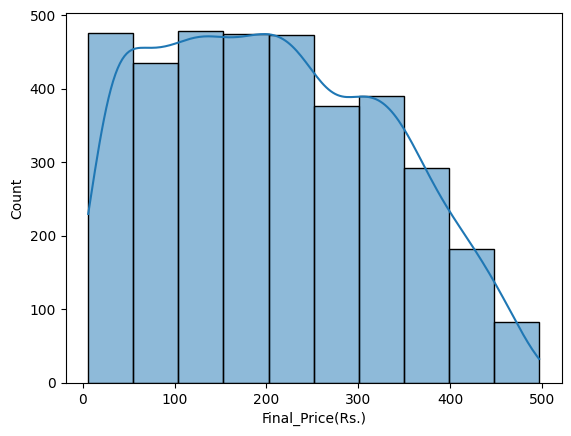

In [8]:
sns.histplot(data=df, x = 'Final_Price(Rs.)', bins = 10, kde = True)

In [9]:
label_encoder = {}
cat_cols = ['Category', 'Payment_Method']

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoder[col] = le    

In [10]:
x = df[['Price (Rs.)', 'Discount (%)', 'Category', 'Payment_Method']]
y = df['Final_Price(Rs.)']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [12]:
y_pred = model.predict(x_test)

In [13]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE")
print(mse)
print("\nR2")
print(r2)

MSE
511.4972018248917

R2
0.9648371251980394
